In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
from itertools import product
from datetime import datetime

## 案例1-

In [2]:
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data=pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
data

0      5922
1      5308
2      5546
3      5975
4      2704
      ...  
85    10894
86    10287
87     9666
88     6072
89     5418
Length: 90, dtype: int64

In [3]:
data.index = pd.Index(data_index)
data

1901-12-31     5922
1902-12-31     5308
1903-12-31     5546
1904-12-31     5975
1905-12-31     2704
              ...  
1986-12-31    10894
1987-12-31    10287
1988-12-31     9666
1989-12-31     6072
1990-12-31     5418
Length: 90, dtype: int64

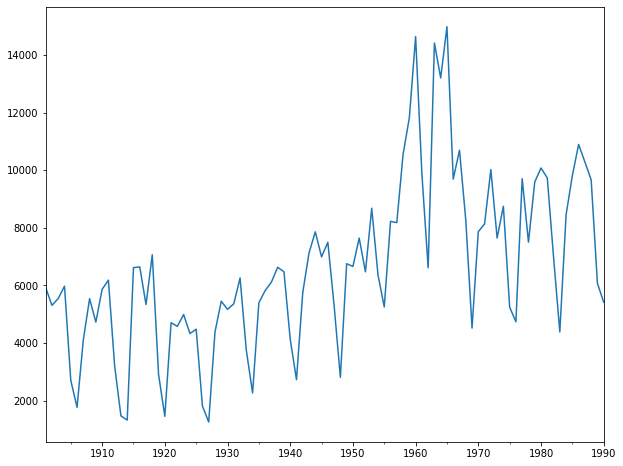

In [6]:
data.plot(figsize=(10,8))

In [7]:
# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print("aic:",arma.aic)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


aic: 1619.6322913948877


In [11]:
y_pred = arma.predict("1990","2020")
y_pred

1990-12-31    5256.281938
1991-12-31    7205.195127
1992-12-31    8577.445159
1993-12-31    9628.327300
1994-12-31    9596.154579
1995-12-31    9191.001257
1996-12-31    7399.076146
1997-12-31    6336.934771
1998-12-31    6872.650200
1999-12-31    7792.711267
2000-12-31    8663.696618
2001-12-31    8925.834723
2002-12-31    8755.656792
2003-12-31    7845.879024
2004-12-31    6971.238343
2005-12-31    6924.548048
2006-12-31    7389.753342
2007-12-31    8004.521175
2008-12-31    8347.306732
2009-12-31    8350.390079
2010-12-31    7903.740269
2011-12-31    7304.422036
2012-12-31    7064.036787
2013-12-31    7220.613549
2014-12-31    7592.732393
2015-12-31    7897.158139
2016-12-31    7990.742513
2017-12-31    7796.486484
2018-12-31    7425.840633
2019-12-31    7171.316916
2020-12-31    7162.854162
Freq: A-DEC, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


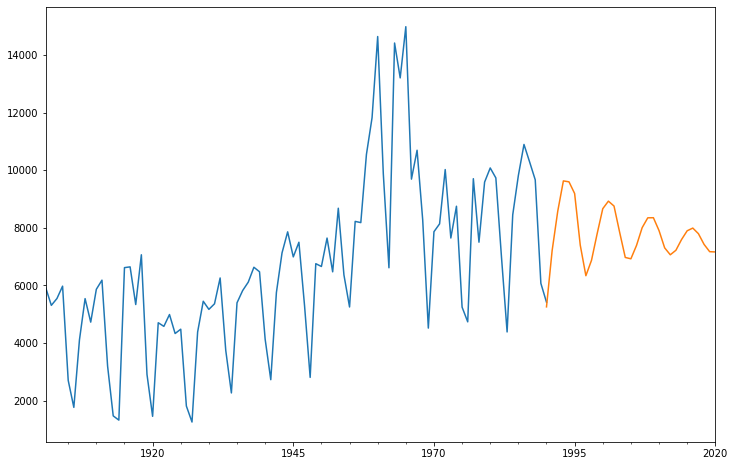

In [12]:
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.ix['1901':].plot(ax=ax)
y_pred.plot(ax=ax)
plt.show()

## 案例2-比特币

In [14]:
df = pd.read_csv('./data/bitcoin-master/bitcoin_2012-01-01_to_2018-10-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011/12/31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012/1/1,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012/1/2,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012/1/3,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012/1/4,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159
...,...,...,...,...,...,...,...,...
2492,2018/10/27,6406.139739,6406.760647,6405.694040,6406.250125,0.929152,5951.054930,6406.251029
2493,2018/10/28,6402.247827,6402.645686,6401.900904,6402.322401,0.872451,5585.740434,6402.290680
2494,2018/10/29,6325.301912,6326.543333,6323.990182,6325.243847,4.100175,25824.917940,6325.211437
2495,2018/10/30,6264.149740,6264.974555,6263.354524,6264.282793,1.985505,12435.244960,6264.195689


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 8 columns):
Timestamp            2497 non-null object
Open                 2494 non-null float64
High                 2494 non-null float64
Low                  2494 non-null float64
Close                2494 non-null float64
Volume_(BTC)         2494 non-null float64
Volume_(Currency)    2494 non-null float64
Weighted_Price       2494 non-null float64
dtypes: float64(7), object(1)
memory usage: 156.2+ KB


In [19]:
df.Timestamp=pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119578,5.208159
...,...,...,...,...,...,...,...,...
2018-10-27,2018-10-27,6406.139739,6406.760647,6405.694040,6406.250125,0.929152,5951.054930,6406.251029
2018-10-28,2018-10-28,6402.247827,6402.645686,6401.900904,6402.322401,0.872451,5585.740434,6402.290680
2018-10-29,2018-10-29,6325.301912,6326.543333,6323.990182,6325.243847,4.100175,25824.917940,6325.211437


In [21]:
# 按照月，季度，年来统计
df_month =df.resample("M").mean()
df_month

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-31,6.208043,6.210657,6.205760,6.208932,5.411459,32.615170,6.208550
2012-02-29,5.253117,5.255079,5.250537,5.252514,8.398000,43.115105,5.252527
2012-03-31,4.963496,4.964408,4.960139,4.961054,15.830074,78.996873,4.962021
2012-04-30,4.976732,4.978059,4.975054,4.976416,19.889151,98.856816,4.976547
...,...,...,...,...,...,...,...
2018-06-30,6784.735025,6788.257506,6780.497546,6784.687206,5.693867,37953.473375,6784.289128
2018-07-31,7097.319648,7100.612715,7093.827154,7097.367347,5.478976,39626.341240,7097.150293
2018-08-31,6689.472569,6692.213191,6686.530949,6689.429479,5.520762,36743.517907,6689.298819


In [23]:
df_Q =df.resample("Q-DEC").mean()
df_Q

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-03-31,5.479759,5.481586,5.477016,5.479038,9.912412,51.761664,5.479242
2012-06-30,5.326608,5.327696,5.325338,5.326423,22.896866,124.651325,5.326512
2012-09-30,10.026331,10.030034,10.022312,10.025868,19.110227,188.212566,10.026230
2012-12-31,12.033701,12.035802,12.031014,12.033101,21.936309,265.408481,12.033069
2013-03-31,33.020105,33.034041,33.007001,33.020657,18.737255,513.049540,33.019913
2013-06-30,117.076264,117.201023,116.918532,117.057654,9.753889,1108.185816,117.059144
2013-09-30,104.363995,104.417739,104.307147,104.367432,12.772127,1310.244645,104.362106
2013-12-31,491.432302,492.244205,490.529950,491.404582,21.083394,10482.799630,491.351404


In [24]:
df_year =df.resample("A-DEc").mean()
df_year

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,8.231974,8.234157,8.229290,8.231481,18.475207,157.887208,8.231637
2013-12-31,187.504133,187.756865,187.219807,187.493509,15.585383,3375.286140,187.478951
2014-12-31,525.455487,525.866411,525.031252,525.460748,11.681561,6058.110049,525.436669
2015-12-31,272.237769,272.370361,272.090766,272.235549,14.233247,3937.145717,272.225658
2016-12-31,565.863169,566.039448,565.666282,565.862685,5.352643,3014.493239,565.848537
2017-12-31,3948.500312,3952.368294,3943.770664,3948.434272,9.458096,42334.709636,3948.071514
2018-12-31,8128.407473,8134.603763,8121.730995,8128.365381,7.472259,64199.331242,8128.073876


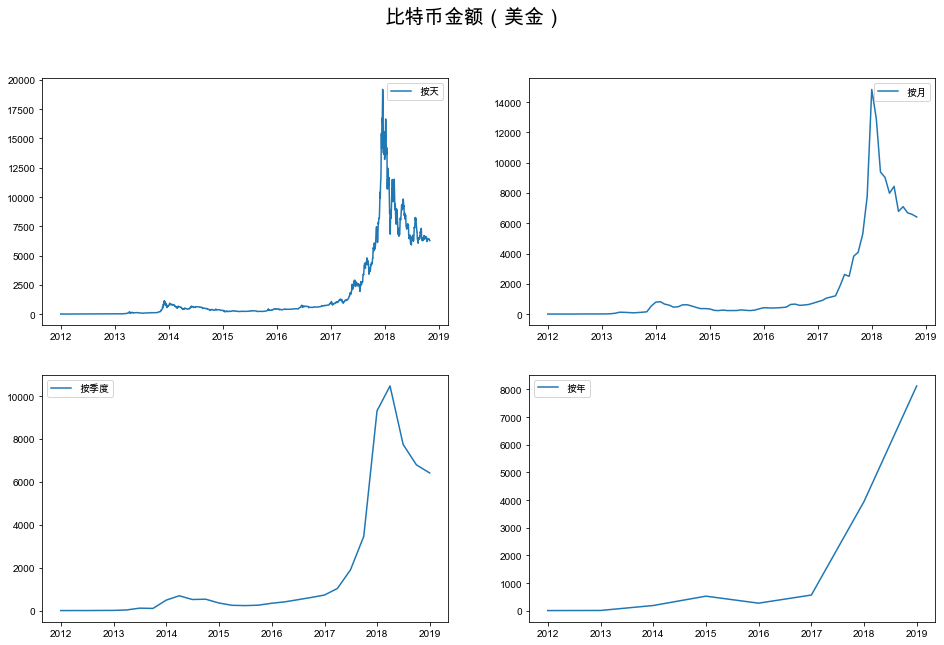

In [26]:
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[16, 10])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # mac 设置别的字体格式
plt.suptitle('比特币金额（美金）', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()

In [29]:
# 设置参数范围
ps = range(0, 3)
qs = range(0, 3)
parameters = product(ps, qs)
parameters_list = list(parameters)
parameters_list

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [30]:
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0], param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
results

参数错误: (0, 2)


[[(0, 0), 1574.9414390103977],
 [(0, 1), 1485.9999435880438],
 [(1, 0), 1388.1339588478638],
 [(1, 1), 1385.5226318002512],
 [(1, 2), 1387.2197829737243],
 [(2, 0), 1386.5055319759429],
 [(2, 1), 1387.3189938737041],
 [(2, 2), 1389.1342325695048]]

In [34]:
best_model

In [33]:
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print('最优模型: ', best_model.summary())

最优模型:                                ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.761
Date:                Wed, 08 Jul 2020   AIC                           1385.523
Time:                        14:54:45   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.410
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2128.9061   1571.255      1.355      0.179    -950.698    5208.510
ar.L1.Weighted_Price     0.9252      0.042     22.033      0.000       0.843       1.008
ma.L1

In [38]:
# 比特币预测
df_month2 = df_month[['Weighted_Price']]
df_month2

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-31,6.208550
2012-02-29,5.252527
2012-03-31,4.962021
2012-04-30,4.976547
...,...
2018-06-30,6784.289128
2018-07-31,7097.150293
2018-08-31,6689.298819


In [39]:
date_list = [datetime(2018, 11, 30), datetime(2018, 12, 31), datetime(2019, 1, 31), datetime(2019, 2, 28), datetime(2019, 3, 31),
             datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
df_month2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Close,High,Low,Open,Volume_(BTC),Volume_(Currency),Weighted_Price,forecast
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,4.471603,2128.906081
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN,6.208550,111.073272
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,5.252527,138.592606
2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,4.962021,128.511652
2012-04-30,NaN,NaN,NaN,NaN,NaN,NaN,4.976547,130.720754
...,...,...,...,...,...,...,...,...
2019-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5284.905249
2019-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5048.850783
2019-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4830.452124
2019-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4628.388697


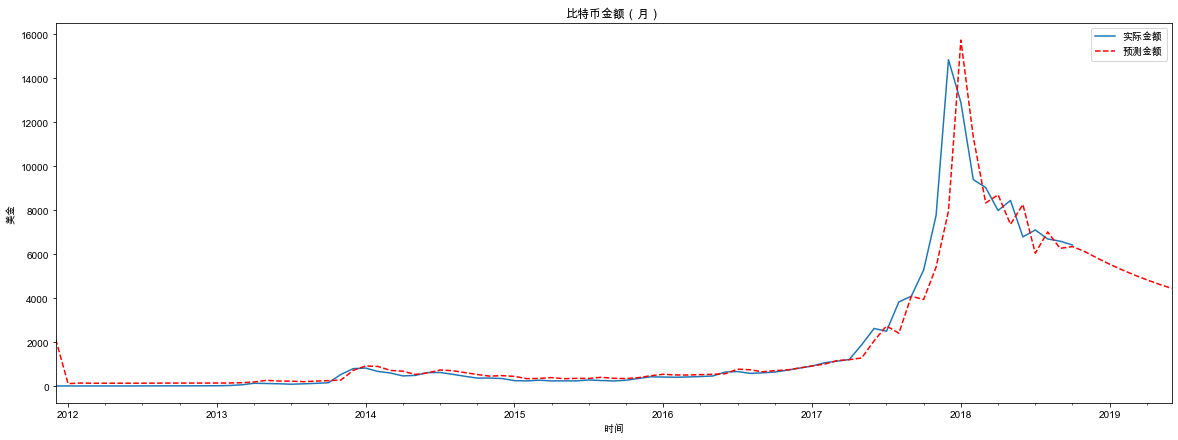

In [40]:
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()